Part 1: Data Loading and Preprocessing

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

1. Load the Dataset: Import the dataset using Pandas and display the first few rows to understand its structure.

In [111]:
df = pd.read_csv("/content/onlinefoods.csv")

df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


2. Handle Missing Values: Identify and handle any missing values in the dataset. Choose an appropriate strategy (e.g., imputation or removal) based on the context.

In [112]:
# Checking for missing values
missing_values = df.isnull().sum()

print(f"Missing values count: \n{missing_values}")

Missing values count: 
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode Categorical Variables: Convert categorical variables into a numeric format suitable for logistic regression. Consider techniques like one-hot encoding or label encoding.

In [113]:
df_dummies = df.copy()

# Creating dummy variables for categorical features
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


4. Feature Selection: Identify which features to include in the model. Justify your selections based on the dataset's context and preliminary analysis.

In [114]:
X = df_dummies.drop(['Pin code', 'Output_No', 'Output_Yes', 'Unnamed: 12_No', 'Unnamed: 12_Yes', 'Monthly Income_No Income', 'Feedback_Positive', 'Feedback_Negative '], axis=1)
y = df_dummies['Feedback_Negative ']

Part 2: Exploratory Data Analysis (EDA)

In [115]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


2. Visualizations: Create visualizations to understand the relationships between features and the target variable.

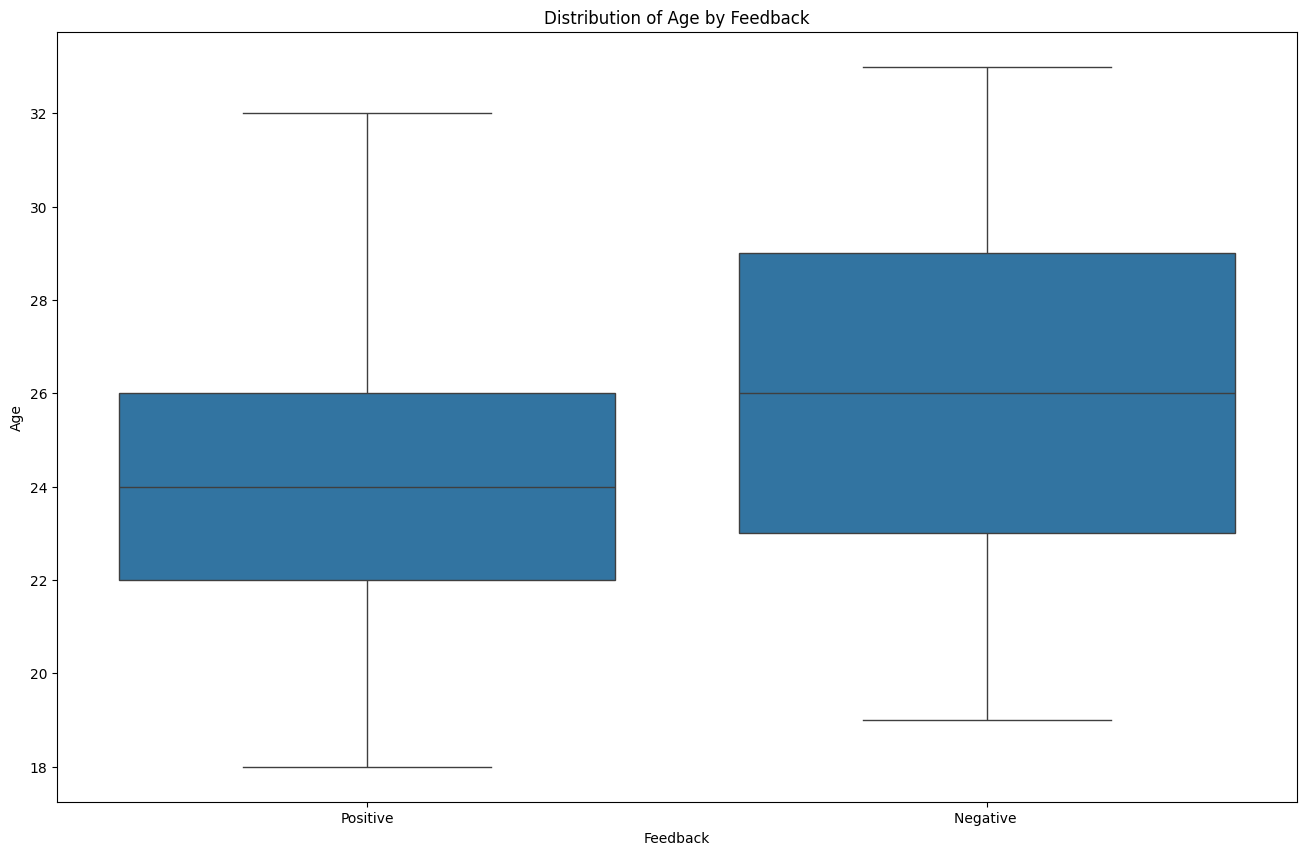

In [116]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Feedback', y='Age', data=df)
plt.title('Distribution of Age by Feedback')
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.show()

<Figure size 1600x1000 with 0 Axes>

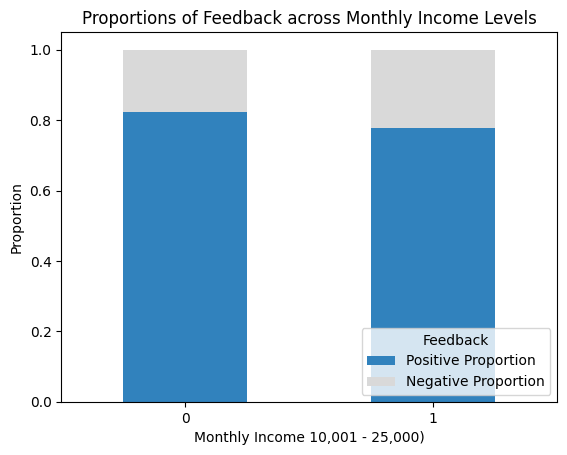

In [117]:
income_feedback = df_dummies.groupby(['Monthly Income_10001 to 25000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(16,10))
income_feedback[['Positive Proportion', 'Negative Proportion']].plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income 10,001 - 25,000)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1600x1000 with 0 Axes>

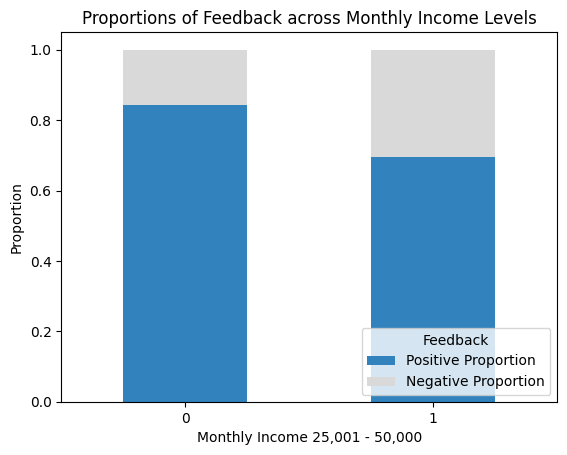

In [118]:
income_feedback = df_dummies.groupby(['Monthly Income_25001 to 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(16,10))
income_feedback[['Positive Proportion', 'Negative Proportion']].plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income 25,001 - 50,000')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1600x1000 with 0 Axes>

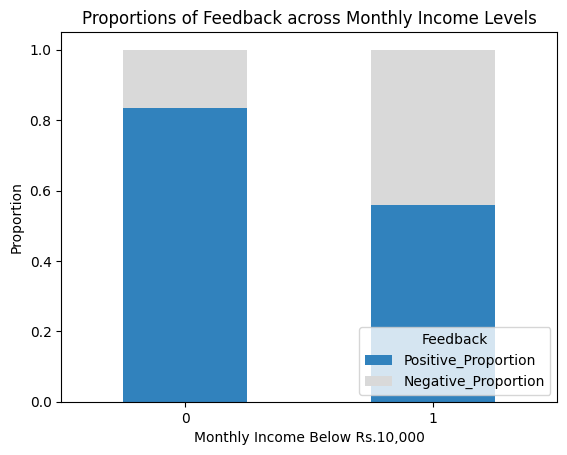

In [119]:
income_feedback = df_dummies.groupby(['Monthly Income_Below Rs.10000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(16,10))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income Below Rs.10,000')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1600x1000 with 0 Axes>

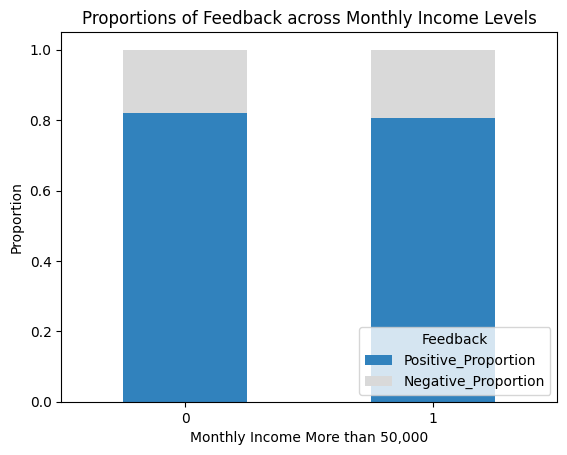

In [120]:
income_feedback = df_dummies.groupby(['Monthly Income_More than 50000', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(16,10))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income More than 50,000')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<Figure size 1600x1000 with 0 Axes>

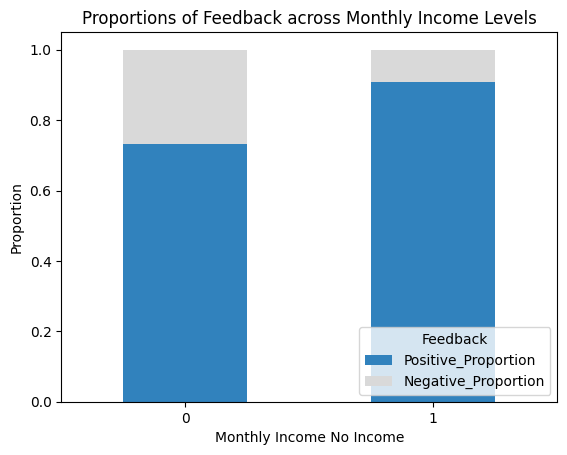

In [121]:
income_feedback = df_dummies.groupby(['Monthly Income_No Income', 'Feedback_Negative ']).size().unstack()
income_feedback['Total'] = income_feedback.sum(axis=1)
income_feedback['Positive_Proportion'] = income_feedback[0] / income_feedback['Total']
income_feedback['Negative_Proportion'] = income_feedback[1] / income_feedback['Total']

plt.figure(figsize=(16,10))
income_feedback[['Positive_Proportion', 'Negative_Proportion']].plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Proportions of Feedback across Monthly Income Levels')
plt.xlabel('Monthly Income No Income')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Feedback', loc='lower right')
plt.show()

<ipython-input-124-7bc084e2fc77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


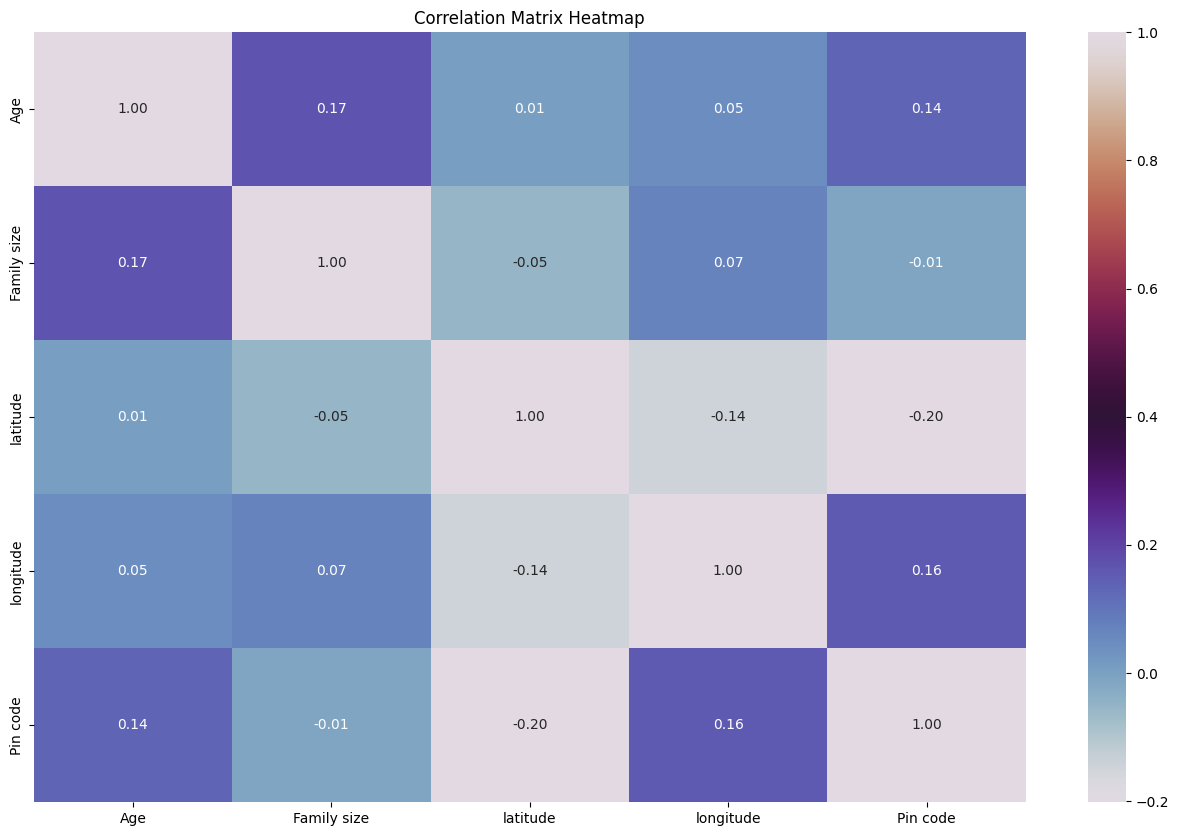

In [124]:
correlation_matrix = df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Part 3: Logistic Regression Model

1. Build the Model: Implement a logistic regression model using scikit-learn. Split your data into training and test sets to evaluate the model's performance.

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [126]:
y_pred = model.predict(X_test_scaled)

2. Model Evaluation: Assess your model's performance using appropriate metrics, such as accuracy, precision, recall, and the confusion matrix. Discuss the results.

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

Accuracy: 0.8461538461538461
Precision: 0.4
Recall: 0.18181818181818182
Confusion Matrix:
 [[64  3]
 [ 9  2]]


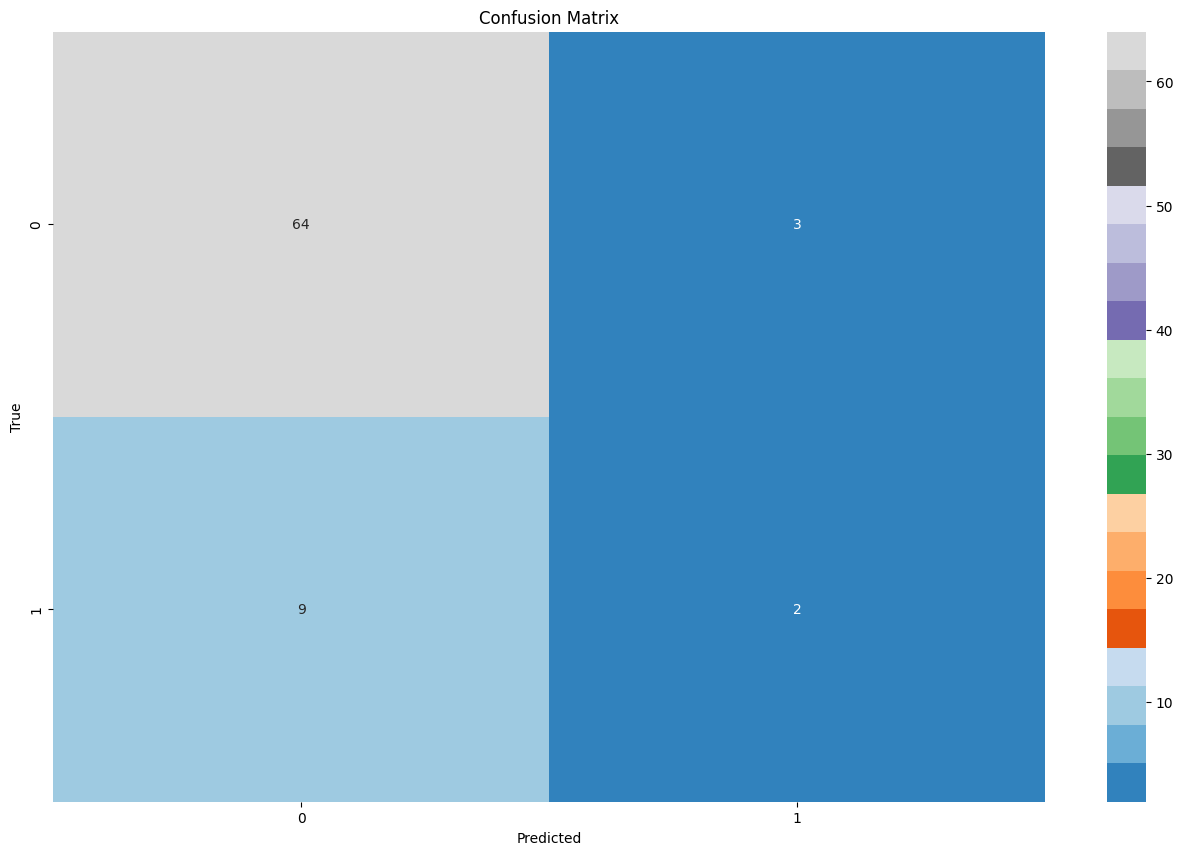

In [133]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(16,10))
sns.heatmap(conf_matrix, annot=True, cmap='tab20c', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Part 4: Data Analysis and Visualization

1. Feature Importance: Analyze and visualize the importance of different features in your logistic regression model. Discuss how each feature influences the prediction of Feedback.

<ipython-input-138-e2e658a477df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='twilight')


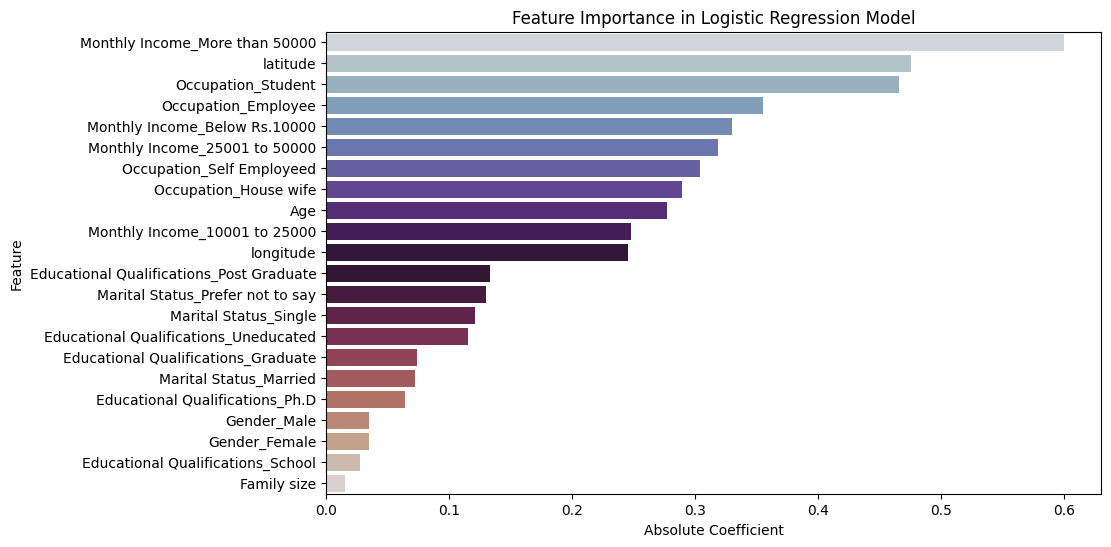

In [138]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='twilight')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

1. Monthly Income_More than 50000: Customers with higher incomes are more likely to give positive feedback, as they may have higher expectations and preferences for premium dining experiences.

2. Latitude and Longitude: Geographical location influences the availability of restaurants and cuisines, affecting customers' dining experiences and feedback.

3. Occupation_Student: Students may prioritize affordability and convenience, influencing their feedback on online food orders.

4. Occupation_Employee: Employees may value speed and reliability in food delivery, impacting their feedback.

5. Monthly Income_Below Rs.10000: Lower income levels may correlate with different expectations and priorities, affecting feedback on factors such as affordability and quality.

6. Monthly Income_25001 to 50000: Customers in this income bracket may have specific preferences and expectations, influencing their feedback.

7. Occupation_Self Employed: Self-employed individuals may prioritize flexibility and customization in their food orders, affecting their feedback.

8. Occupation_Housewife: Housewives may prioritize factors such as convenience and family preferences, influencing their feedback.

9. Age: Different age groups may have varying preferences and expectations, influencing their feedback on online food orders.

10. Monthly Income_10001 to 25000: This income bracket likely represents a significant portion of customers, and their feedback can be influenced by their specific financial situation and preferences.

11. Longitude: Similar to latitude, longitude represents geographical location and can impact the availability of restaurants and cuisines, affecting feedback.

12. Educational Qualifications_Post Graduate: Higher education levels may correlate with specific preferences and expectations, influencing feedback.

13. Marital Status_Prefer not to say: Customers who prefer not to disclose their marital status may have diverse preferences and priorities, impacting feedback.

14. Marital Status_Single: Single individuals may have different dining habits and preferences compared to married individuals, affecting their feedback.

15. Educational Qualifications_Uneducated: This category may represent customers with varying levels of exposure to different cuisines and dining experiences, influencing feedback.

16. Educational Qualifications_Graduate: Graduates may have specific preferences and expectations based on their educational background, impacting feedback.

17. Marital Status_Married: Married individuals may prioritize factors such as family preferences and budget considerations, affecting their feedback.

18. Educational Qualifications_Ph.D: Customers with a Ph.D. may have distinct preferences and expectations, influencing their feedback.

19. Gender_Male: Gender can play a role in food preferences, ordering habits, and expectations, potentially influencing feedback.

20. Gender_Female: Similarly, female customers may have different preferences and expectations compared to male customers, impacting feedback.

21. Educational Qualifications_School: Customers with school-level education may have varying preferences and expectations, influencing their feedback.

22. Family size: Despite its lower coefficient, family size can still have an impact on feedback, particularly regarding considerations such as portion sizes, affordability, and variety, especially for larger families.

2. Prediction Insights: Visualize the distribution of predicted probabilities. Discuss any patterns or insights you can derive from how the model makes predictions.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


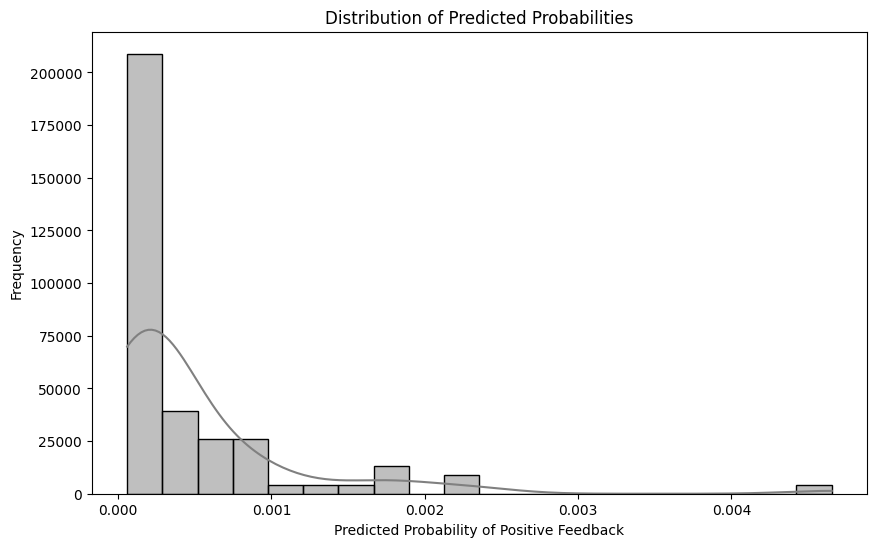

In [160]:
y_pred_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10,6))
sns.histplot(y_pred_probs, bins=20, kde=True, color='gray', edgecolor ='black', stat='frequency')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Positive Feedback')
plt.ylabel('Frequency')
plt.show()

***Predicted probability distribution is visualized as a histogram with a kernel density estimate superimposed. This provides insights into the prediction behavior of the model: extreme probabilities are concentrated around, indicating high confidence; multiple peaks indicate distinct subgroups; and the spread of probabilities indicate uncertainty or possible overlap between classes.***